Saving Crop_recommendation.csv to Crop_recommendation.csv
First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


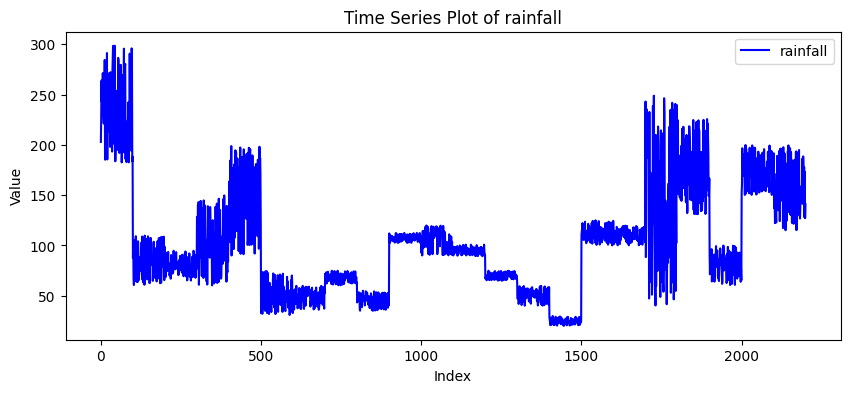


ADF Test Results:
Test Statistic: -3.38953014162007
P-value: 0.011321008714268511
Critical Values: {'1%': np.float64(-3.4333629045681398), '5%': np.float64(-2.8628709972102797), '10%': np.float64(-2.567478556227762)}
Conclusion: The series is likely STATIONARY (Reject H0).

KPSS Test Results:
Test Statistic: 0.9597635757263195
P-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: The series is likely NON-STATIONARY (Reject H0).


<ipython-input-1-c11a9fd6baa9>:52: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from google.colab import files

# Step 1: Upload the file manually
uploaded = files.upload()

# Get the file name dynamically
file_name = list(uploaded.keys())[0]

# Step 2: Load the CSV file
df = pd.read_csv(file_name)

# Display the first few rows to check column names
print("First few rows of the dataset:")
print(df.head())

# Step 3: Choose a column for time series analysis (Modify as needed)
column_name = "rainfall"  # Change this if needed
if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' not found in dataset. Check column names: {df.columns}")

# Convert the column into a time series
time_series = df[column_name]

# Step 4: Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series, label=column_name, color='b')
plt.title(f"Time Series Plot of {column_name}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 5: Define ADF Test
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    print("\nADF Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Conclusion: The series is likely STATIONARY (Reject H0).")
    else:
        print("Conclusion: The series is NON-STATIONARY (Fail to reject H0).")

# Step 6: Define KPSS Test
def kpss_test(series):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    print("\nKPSS Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print(f"Critical Values: {result[3]}")
    if result[1] < 0.05:
        print("Conclusion: The series is likely NON-STATIONARY (Reject H0).")
    else:
        print("Conclusion: The series is STATIONARY (Fail to reject H0).")

# Step 7: Perform stationarity tests
adf_test(time_series)
kpss_test(time_series)
